In [1]:
# %pip install pandas numpy
# %pip install sentence-transformers
# %pip install scikit-learn
# %pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from preprocessing import clean_data


In [3]:
airline_df = pd.read_csv("datasets/Airline Dataset Updated - v2.csv")
delta_df = pd.read_csv("datasets/Delta_Airline_Review_Dataset-Asof02172023.csv")

print(f'airline_df.shape: {airline_df.shape}')
print(f'delta_df.shape: {delta_df.shape}')


airline_df.shape: (98619, 15)
delta_df.shape: (2689, 8)


### Data Cleaning

In [4]:
clean_col = ""
for col in delta_df.columns:
    clean_col = col.strip()
    delta_df.rename(columns={col: clean_col}, inplace=True)

clean_data(delta_df)

----Data Cleaned----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer_ID     2689 non-null   int64         
 1   star rating     2689 non-null   int64         
 2   date            2689 non-null   datetime64[ns]
 3   Seat Type       2689 non-null   object        
 4   routes          2689 non-null   object        
 5   traveler_types  2689 non-null   object        
 6   country         2689 non-null   object        
 7   reviews         2689 non-null   object        
 8   sentiment       2689 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 170.9+ KB
None

Null values:
 Customer_ID       0
star rating       0
date              0
Seat Type         0
routes            0
traveler_types    0
country           0
reviews           0
sentiment         0
dtype: int64

Se

,Customer_ID,star rating,date,Seat Type,routes,traveler_types,country,reviews,sentiment
0,1,4,2023-02-17,economy class,new york to tel aviv,solo leisure,united states,"first, travel starts 6pm arrival at the air...",Positive
1,2,1,2023-02-16,economy class,milwaukee to ft lauderdale,business,united states,delta did not issue any weather waivers so ...,Negative
2,3,1,2023-02-10,economy class,new york to charlotte,business,united states,"per our pilot, there would be a slight dela...",Negative
3,4,1,2023-02-08,premium economy,atlanta to cape town,family leisure,united states,we flew from atlanta to cape town and back ...,Negative
4,5,2,2023-02-06,economy class,dallas to atlanta,solo leisure,united kingdom,"checkin staff always seem unfriendly, no ma...",Negative
...,...,...,...,...,...,...,...,...,...
2684,2685,3,2013-09-29,economy class,,,united states,aus to jfk jfk to nce flight dl 1972 and dl 00...,Negative
2685,2686,3,2013-09-29,economy class,,,united kingdom,lhr-jfk-lax-lhr (via detroit). i purchased the...,Negative
2686,2687,10,2013-09-29,business class,,,united states,i have been a gold member for at least one yea...,Positive
2687,2688,9,2013-09-26,economy class,,,united states,whatever happened to schedule integrity? we bo...,Positive


### Satisfaction Analysis

In [5]:
delta_df.head()


,Customer_ID,star rating,date,Seat Type,routes,traveler_types,country,reviews
0,1,4,17th February 2023,Economy Class,New York to Tel Aviv,Solo Leisure,United States,"✅ Trip Verified | First, travel starts 6pm ar..."
1,2,1,16th February 2023,Economy Class,Milwaukee to Ft Lauderdale,Business,United States,✅ Trip Verified | Delta did not issue any wea...
2,3,1,10th February 2023,Economy Class,New York to Charlotte,Business,United States,"✅ Trip Verified | Per our pilot, there would ..."
3,4,1,8th February 2023,Premium Economy,Atlanta to Cape Town,Family Leisure,United States,✅ Trip Verified | We flew from Atlanta to Cap...
4,5,2,6th February 2023,Economy Class,Dallas to Atlanta,Solo Leisure,United Kingdom,✅ Trip Verified | Checkin staff always seem u...


In [6]:
# Encode categorical features
label_encoders = {}
for col in ['date', 'Seat Type', 'traveler_types', 'routes', 'country']:
    if col in delta_df.columns:
        le = LabelEncoder()
        delta_df[col] = le.fit_transform(delta_df[col].astype(str))
        label_encoders[col] = le


# Features and target
X = delta_df[['date', 'traveler_types']]
y = delta_df['star rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 14.931415407690412
R² Score: -0.2582944554748845


### Visualization Functions

In [8]:
def plot_decision_tree(model, feature_names, max_depth=3, figsize=(20,10)):
    plt.figure(figsize=figsize)
    # Get a single tree from the forest
    tree = model.estimators_[0]
    plot_tree(tree, 
             feature_names=feature_names,
             max_depth=max_depth,
             filled=True,
             rounded=True)
    plt.show()

def plot_feature_importance(model, feature_names, figsize=(10,6)):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=figsize)
    plt.title('Feature Importance in Delta Airlines Reviews')
    plt.bar(range(len(importances)), 
            importances[indices],
            align='center')
    plt.xticks(range(len(importances)), 
               [feature_names[i] for i in indices], 
               rotation=45,
               ha='right')
    plt.tight_layout()
    plt.show()

### Visualization

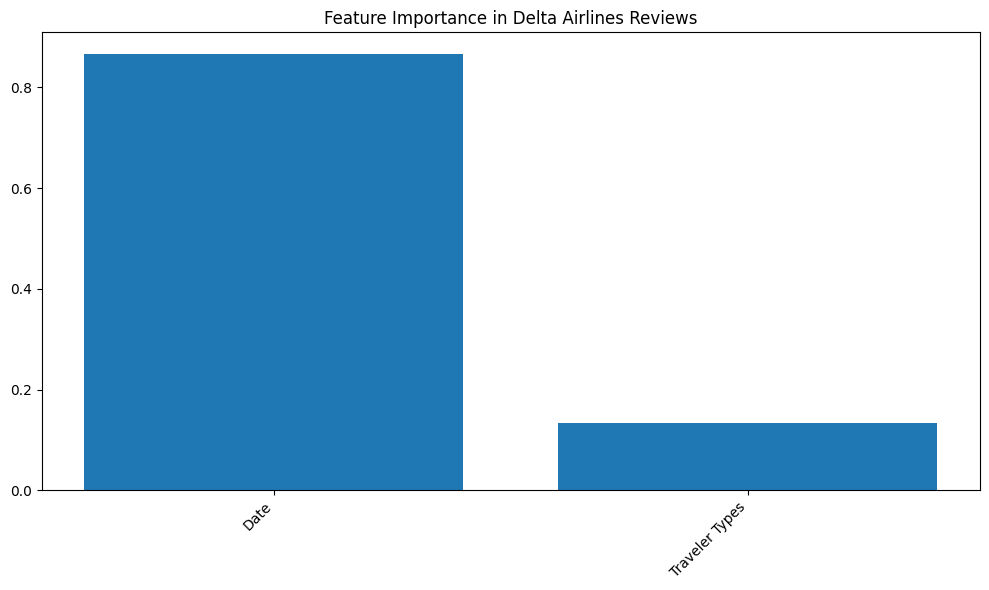

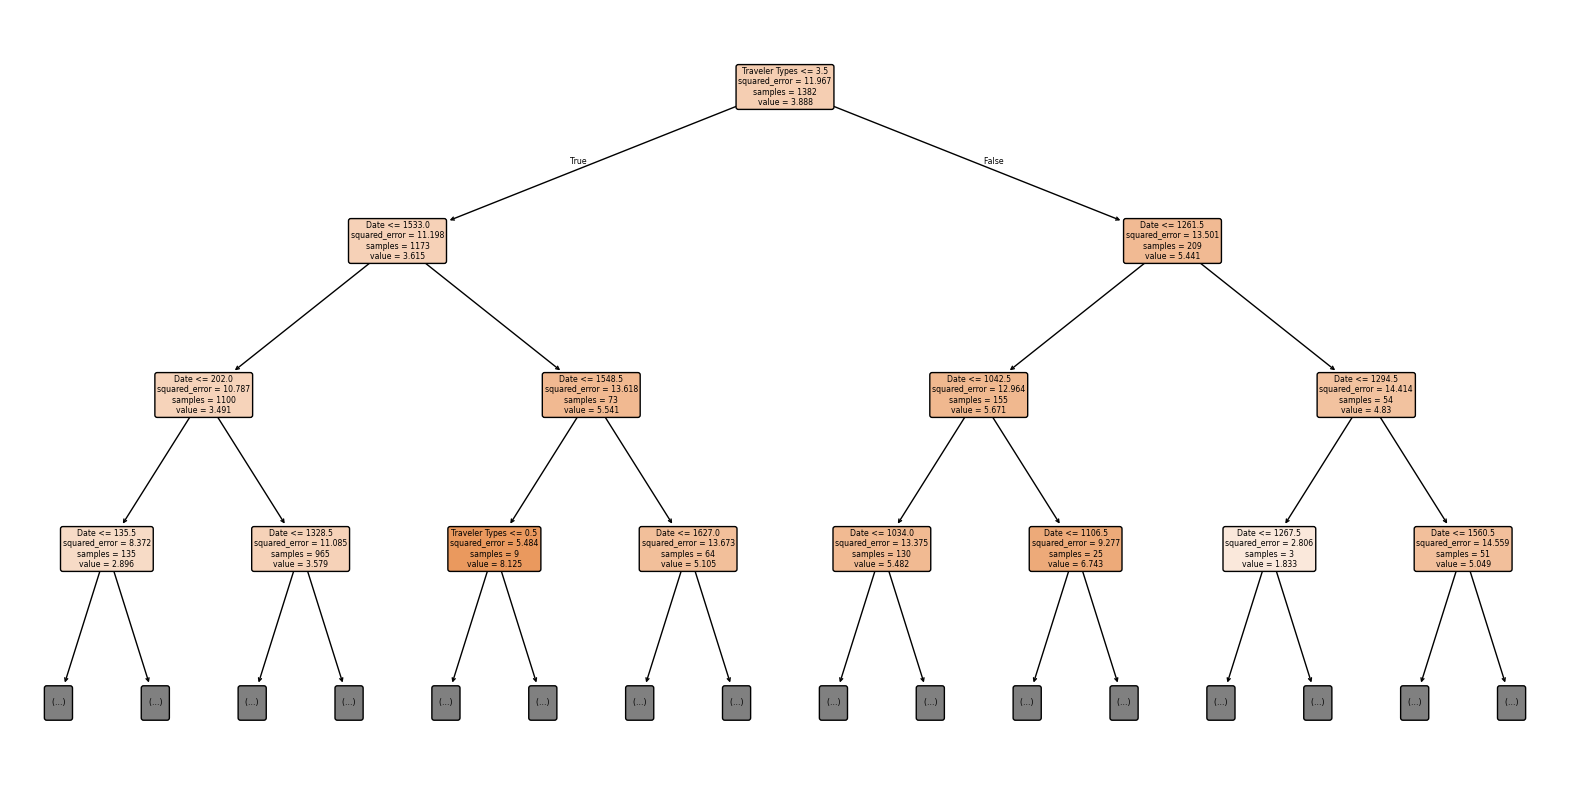

In [9]:
# Visualize feature importance
feature_names = ['Date', 'Traveler Types']  # Your actual feature names
plot_feature_importance(
    model=model,
    feature_names=feature_names
)

# Visualize a single tree from the forest
plot_decision_tree(
    model=model,
    feature_names=feature_names,
    max_depth=3
)

<Figure size 1000x600 with 0 Axes>

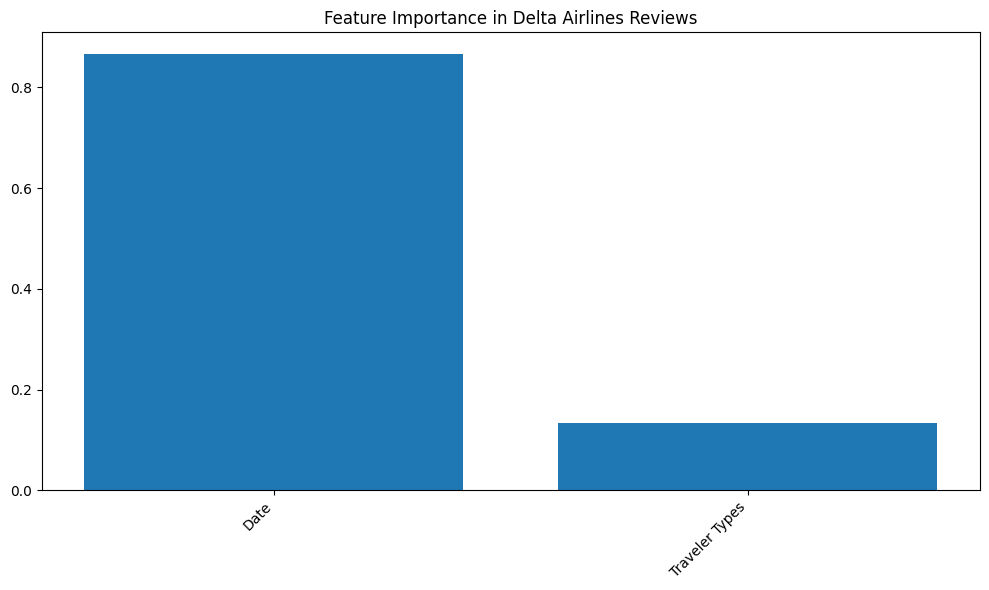

<Figure size 2000x1000 with 0 Axes>

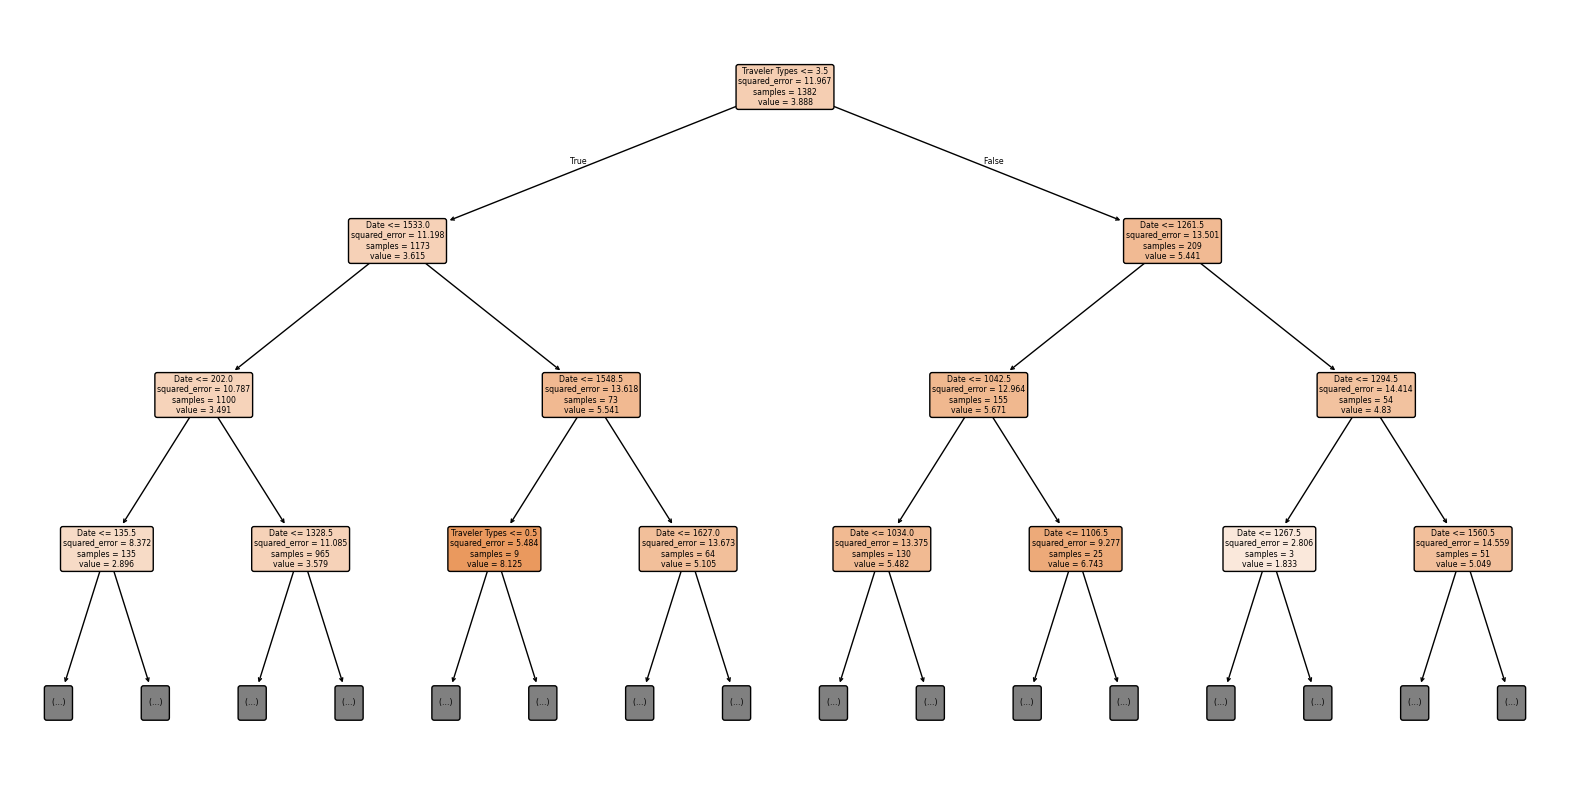

In [10]:
# Save visualizations
import os

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Save feature importance plot
plt.figure(figsize=(10,6))
plot_feature_importance(model=model, feature_names=feature_names)
plt.savefig('images/feature_importance.png', bbox_inches='tight', dpi=300)
plt.close()

# Save decision tree plot
plt.figure(figsize=(20,10))
plot_decision_tree(model=model, feature_names=feature_names, max_depth=3)
plt.savefig('images/decision_tree.png', bbox_inches='tight', dpi=300)
plt.close()

def update_readme_with_results(mse, r2_score):
    """Update README with model results and images"""
    with open('README.md', 'r') as file:
        content = file.read()
    
    results = f"""
### Model Results
- Mean Squared Error: {mse:.2f}
- R² Score: {r2_score:.2f}

#### Feature Importance
![Feature Importance](images/feature_importance.png)
1. Date: Accounts for most of the variance in ratings
2. Traveler Types: Has less impact on ratings

#### Decision Tree Visualization
![Decision Tree](images/decision_tree.png)

#### Model Interpretation
- The current model shows poor performance (negative R² score) suggesting that:
  - We need more features (like Seat Type, Routes, Country)
  - Date might need better preprocessing (e.g., extract month, day of week)
  - Text analysis of reviews could provide valuable insights
  - Consider using more advanced models or ensemble methods
"""
    
    # Add results after the prediction section
    updated_content = content.replace(
        "2. Predicting customer satisfaction (Delta dataset)",
        "2. Predicting customer satisfaction (Delta dataset)\n" + results
    )
    
    with open('README.md', 'w') as file:
        file.write(updated_content)

# Update README with current results and images
update_readme_with_results(
    mse=mean_squared_error(y_test, y_pred),
    r2_score=r2_score(y_test, y_pred)
)

# Add images folder to .gitignore
with open('.gitignore', 'a') as f:
    f.write('\n# Ignore images folder\n!images/\n')

In [17]:
from sentence_transformers import SentenceTransformer
from preprocessing import clean_data

cleaned_delta_df = clean_data(delta_df)


def tokenize_text(text):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(text)
    return embeddings

cleaned_delta_df['embedding'] = cleaned_delta_df['reviews'].apply(tokenize_text)

cleaned_delta_df.head()

----Data Cleaned----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer_ID     2689 non-null   int64         
 1   star rating     2689 non-null   int64         
 2   date            2689 non-null   datetime64[ns]
 3   Seat Type       2689 non-null   int64         
 4   routes          2689 non-null   int64         
 5   traveler_types  2689 non-null   int64         
 6   country         2689 non-null   int64         
 7   reviews         2689 non-null   object        
 8   embedding       2689 non-null   object        
 9   sentiment       2689 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(6), object(2)
memory usage: 192.0+ KB
None

Null values:
 Customer_ID       0
star rating       0
date              0
Seat Type         0
routes            0
traveler_types    0
country           0
rev

,Customer_ID,star rating,date,Seat Type,routes,traveler_types,country,reviews,embedding,sentiment
0,1,4,1970-01-01 00:00:00.000000382,1,1234,3,52,"first, travel starts 6pm arrival at the air...","[0.024619475, -6.6272616e-05, -0.04313843, 0.0...",Positive
1,2,1,1970-01-01 00:00:00.000000327,1,1047,0,52,delta did not issue any weather waivers so ...,"[0.035706792, -0.00026602639, 0.09281349, 0.05...",Negative
2,3,1,1970-01-01 00:00:00.000000019,1,1191,0,52,"per our pilot, there would be a slight dela...","[-0.018216042, -0.01939794, 0.09816006, 0.0773...",Negative
3,4,1,1970-01-01 00:00:00.000001541,3,95,2,52,we flew from atlanta to cape town and back ...,"[-0.061806098, 0.046007663, 0.048093565, 0.043...",Negative
4,5,2,1970-01-01 00:00:00.000001432,1,453,3,51,"checkin staff always seem unfriendly, no ma...","[0.032726165, -0.010963082, 0.0104207145, 0.00...",Negative


### Train Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# Features and target
X = np.array(cleaned_delta_df['embedding'].tolist())
y = cleaned_delta_df['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")


Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.92      0.74       331
    Positive       0.42      0.09      0.14       207

    accuracy                           0.60       538
   macro avg       0.52      0.51      0.44       538
weighted avg       0.54      0.60      0.51       538

